In [246]:
# importing all the required packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statistics
import scipy
from scipy.optimize import curve_fit
from statistics import mean

# Syringe pressure measurement

### Data Preparation

In [247]:
# reading csv to dataframe

read_df1 = pd.read_csv("Data2/syringe1.csv")
read_df1

,Number\tAnalog in 1\tAnalog in 2
0,n/#\tU1/V\tU2/V
1,1.0\t-0.01\t2.54
2,2.0\t0.00\t2.72
3,3.0\t-0.01\t2.87
4,4.0\t0.00\t3.03
5,5.0\t0.00\t3.20
6,6.0\t0.00\t3.39
7,7.0\t-0.01\t3.61
8,8.0\t0.00\t3.77
9,9.0\t-0.01\t3.97


In [248]:
# converting messy formating table (table in the cell above) to a a well-structured one with correct header
df1 = (pd.DataFrame(read_df1['Number\tAnalog in 1\tAnalog in 2'].str.split('\t').tolist(), columns=['n','Volume','Pressure'])).iloc[1:,:]

# converting the data type from string to numeric (float)
df1['Pressure'] = pd.to_numeric(df1['Pressure'])
df1['Volume'] = pd.to_numeric(df1['Volume'])
df1

,n,Volume,Pressure
1,1.0,-0.01,2.54
2,2.0,0.00,2.72
3,3.0,-0.01,2.87
4,4.0,0.00,3.03
5,5.0,0.00,3.20
6,6.0,0.00,3.39
7,7.0,-0.01,3.61
8,8.0,0.00,3.77
9,9.0,-0.01,3.97
10,10.0,0.00,4.23


In [249]:
# defining some pre-determined quantities

Vinit = 38  # initial volume before the syringe was pushed
Vfinal = 38 - 3.4 # final volume when the syringe has been pushed to minimum volume
Pinit = 101 # atmospheric pressure 101 kPa (initial pressure before the syringe was pushed)

In [250]:
# from ideal gas law, PV = nRT, where nRT is always constant in this part of the experiment

nRT = Vinit * Pinit

In [251]:
# Calculate final pressure from ideal gas law P = nRT/V

Pfinal = nRT / Vfinal
Pfinal

110.92485549132948

In [253]:
# scaling the data of the pressure from range 101 kPA (Pinit) to 110.92 (Pfinal)
scaler = MinMaxScaler(feature_range=(Pinit,Pfinal))
pres = df1['Pressure'].values.reshape(-1, 1)
scaler.fit(pres)
pres2 = scaler.transform(pres)
df1['Pressure (physical)'] = pres2

In [254]:
# input the data of the syringe volume
# initial volume is 6 ml with increment of 0.2 for every click
syringe_volume = []
for i in range(18):
    syringe_volume.append(6.0-i*0.2)
df1['Syringe Volume'] = syringe_volume

In [258]:
# scaling the data of the pressure from range 38 (Vinit) to 34.6 (Vfinal)
scaler = MinMaxScaler(feature_range=(Vfinal,Vinit))
vol = df1['Syringe Volume'].values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df1['Volume (physical)'] = vol2

In [259]:
# calculating nRT using P * V for all the observations

df1['nRT'] = df1['Pressure (physical)'] * df1['Volume (physical)']
df1

,n,Volume,Pressure,Pressure (physical),Syringe Volume,Volume (physical),nRT
1,1.0,-0.01,2.54,101.000000,6.0,38.0,3838.000000
2,2.0,0.00,2.72,101.386683,5.8,37.8,3832.416605
3,3.0,-0.01,2.87,101.708918,5.6,37.6,3824.255326
4,4.0,0.00,3.03,102.052636,5.4,37.4,3816.768593
5,5.0,0.00,3.20,102.417836,5.2,37.2,3809.943518
6,6.0,0.00,3.39,102.826002,5.0,37.0,3804.562057
7,7.0,-0.01,3.61,103.298614,4.8,36.8,3801.388985
8,8.0,0.00,3.77,103.642332,4.6,36.6,3793.309339
9,9.0,-0.01,3.97,104.071979,4.4,36.4,3788.220039
10,10.0,0.00,4.23,104.630521,4.2,36.2,3787.624850


In [257]:
# to save the cleaned data (table above) into excel, remove the '#' to run
# df1.to_excel('syringe_converted1.xlsx')

In [260]:
# statistical summary of the data

df1.describe()

,Volume,Pressure,Pressure (physical),Syringe Volume,Volume (physical),nRT
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,-0.005000,4.397778,104.990947,4.300000,36.300000,3808.139981
std,0.005145,1.423222,3.057417,1.067708,1.067708,17.696095
min,-0.010000,2.540000,101.000000,2.600000,34.600000,3786.032880
25%,-0.010000,3.247500,102.519878,3.450000,35.450000,3793.966510
50%,-0.005000,4.100000,104.351250,4.300000,36.300000,3804.272551
75%,0.000000,5.380000,107.100993,5.150000,37.150000,3822.383643
max,0.000000,7.160000,110.924855,6.000000,38.000000,3838.000000


In [261]:
nR = df1['nRT'].mean()/(27.5+273.15)
nR

12.666356166397021

### Fitting and Plotting

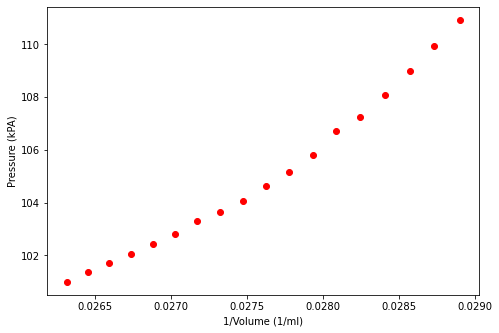

In [262]:
# P vs 1/V diagram, should result in linear graph since T is constant

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(1/df1['Volume (physical)'], df1['Pressure (physical)'], color='r')
ax.set_xlabel('1/Volume (1/ml)')
ax.set_ylabel('Pressure (kPA)')
plt.show()

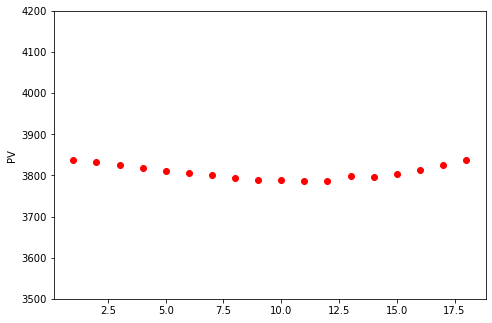

In [263]:
# PV vs time, should result in horizontal line since PV = nRT is constant

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df1.index, df1['nRT'], color='r')
ax.set_ylabel('PV')
plt.ylim(3500,4200)
plt.show()

In [264]:
# define linear equation for fitting the data

def best_fit(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

def func(x, m, c):
    return m * x + c

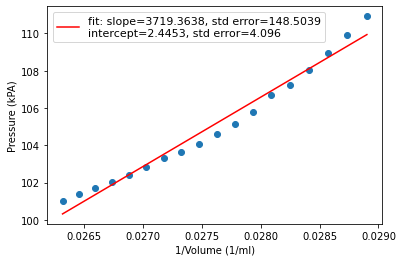

In [265]:
# Fitting the P vs 1/V graph using linear equation to find nRT from the gradient

xdata = 1/df1['Volume (physical)']
ydata = df1['Pressure (physical)']
m, c = best_fit(xdata, ydata)
y = func(xdata, m, c)
plt.scatter(xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata)
SE = np.sqrt(np.diag(pcov))
SE_A = SE[0]
SE_B = SE[1]
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: slope=' + str(round(popt[0], 4)) + ', std error=' + str(round(SE_A, 4))
         + '\nintercept=' + str(round(popt[1], 4)) + ', std error=' + str(round(SE_B, 4)))
plt.xlabel('1/Volume (1/ml)')
plt.ylabel('Pressure (kPA)')
plt.legend(loc=2, prop={'size': 11})
plt.show()

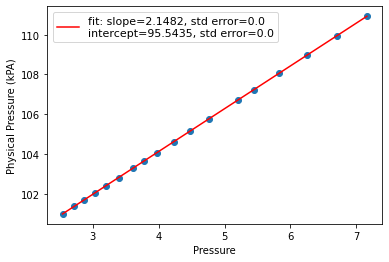

y = 2.15 x + 95.54


In [266]:
# Fitting physical pressure vs measurement pressure

xdata = df1['Pressure']
ydata = df1['Pressure (physical)']
m, c = best_fit(xdata, ydata)
y = func(xdata, m, c)
plt.scatter(xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata)
SE = np.sqrt(np.diag(pcov))
SE_A = SE[0]
SE_B = SE[1]
slope0 = popt[0] # this is the slope that later will be used for the convertion of pressure data
intercept0 = popt[1] # this is the gradient that later will be used for the convertion of pressure data
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: slope=' + str(round(popt[0], 4)) + ', std error=' + str(round(SE_A, 4))
         + '\nintercept=' + str(round(popt[1], 4)) + ', std error=' + str(round(SE_B, 4)))
plt.xlabel('Pressure')
plt.ylabel('Physical Pressure (kPA)')
plt.legend(loc=2, prop={'size': 11})
plt.show()
print('y =', str(round(slope0, 2)), 'x +', str(round(intercept0, 2)))

# Stirling Engine

In [267]:
read_df2 = pd.read_csv("Data2/stirling2.csv")
df2 = (pd.DataFrame(read_df2['Analog in 1\tAnalog in 1\tAnalog in 2'].str.split('\t').tolist()[1:], columns=['Volume', 'Volume', 'Pressure'])).iloc[:,1:]

# converting the data type from string to numeric (float)
df2['Volume'] = pd.to_numeric(df2["Volume"])
df2['Pressure'] = pd.to_numeric(df2["Pressure"])

In [268]:
df2

,Volume,Pressure
0,1.96,3.33
1,4.87,3.07
2,2.96,2.10
3,0.01,2.23
4,2.41,3.42
...,...,...
245,0.03,2.18
246,2.17,3.38
247,4.90,3.03
248,2.78,2.07


In [269]:
# Apply the equation from the syringe experiment
df2['Pressure (physical)'] = slope0 * df2['Pressure'] + intercept0

In [270]:
# Scale volume to actual value using scaler (same as before)

scaler = MinMaxScaler(feature_range=(32,44))
vol = -1*(df2['Volume']).values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df2['Volume (physical)'] = vol2

In [271]:
# calculating nRT from PV = nRT
df2['nRT'] = df2['Pressure (physical)'] * df2['Volume (physical)']

# sort the table by nRT (temperature)
df2_temp = df2.sort_values(by=['nRT'])
df2_temp

,Volume,Pressure,Pressure (physical),Volume (physical),nRT
130,4.90,2.84,101.644471,32.024390,3255.102210
173,4.89,2.81,101.580024,32.048780,3255.515892
48,4.90,2.86,101.687436,32.024390,3256.478129
87,4.91,2.90,101.773365,32.000000,3256.747692
169,4.91,2.92,101.816330,32.000000,3258.122563
...,...,...,...,...,...
210,0.00,2.33,100.548870,43.975610,4421.697878
50,0.03,2.42,100.742212,43.902439,4422.828800
171,0.01,2.37,100.634800,43.951220,4423.022172
7,-0.01,2.32,100.527388,44.000000,4423.205065


In [272]:
df2_temp.describe()

,Volume,Pressure,Pressure (physical),Volume (physical),nRT
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2.514240,2.685160,101.311838,37.843317,3831.804662
std,1.759299,0.550935,1.183539,4.290973,417.138449
min,-0.010000,1.960000,99.754022,32.000000,3255.102210
25%,0.765000,2.150000,100.162188,33.560976,3417.790657
50%,2.580000,2.620000,101.171859,37.682927,3821.160888
75%,4.270000,3.225000,102.471542,42.109756,4252.583743
max,4.910000,3.540000,103.148237,44.000000,4423.966348


In [273]:
# finding data points that have maximum and minimum temperature

T_max = df2_temp['nRT'].max()
T_min = df2_temp['nRT'].min()

In [274]:
# finding the pressure and volume of the maximum (p1, v1) and minimum (p2, v2) temperature

p1, v1 = np.array(df2_temp.loc[df2_temp['nRT']==T_min][['Pressure (physical)', 'Volume (physical)']])[0]
p2, v2 = np.array(df2_temp.loc[df2_temp['nRT']==T_max][['Pressure (physical)', 'Volume (physical)']])[0]

In [275]:
print("Vmax: ", v2)
print("Vmin: ", v1)

Vmax:  43.951219512195124
Vmin:  32.02439024390244


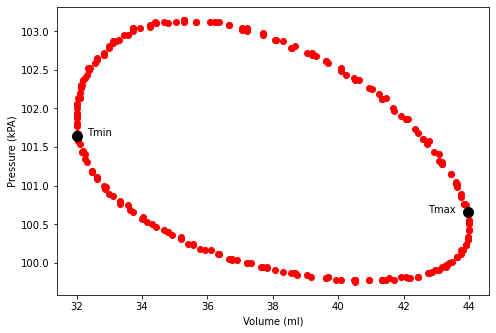

In [276]:
# plot PV diagram using scatter plot

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df2_temp['Volume (physical)'], df2_temp['Pressure (physical)'], color='r')
ax.set_xlabel('Volume (ml)')
ax.set_ylabel('Pressure (kPA)')
plt.scatter([v1, v2], [p1, p2], color='black', s=100, marker='o')
plt.annotate('Tmin', (v1+0.3, p1))
plt.annotate('Tmax', (v2-1.2, p2))
plt.show()

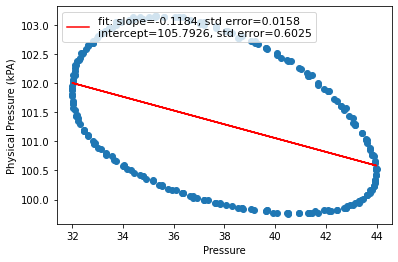

y = -0.12 x + 105.79


In [277]:
# plotting the best fit line to split data into two parts (upper part and lower part)
# splitting is needed so that we can calculate the work done (integral) correctly since the data is in the form of data points and not function (numpy can't automatically calculate the enclosed area)

xdata = df2_temp['Volume (physical)']
ydata = df2_temp['Pressure (physical)']
m, c = best_fit(xdata, ydata)
y = func(xdata, m, c)
plt.scatter(xdata, ydata)
popt, pcov = curve_fit(func, xdata, ydata)
SE = np.sqrt(np.diag(pcov))
SE_A = SE[0]
SE_B = SE[1]
slope1 = popt[0]
intercept1 = popt[1]
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: slope=' + str(round(popt[0], 4)) + ', std error=' + str(round(SE_A, 4))
         + '\nintercept=' + str(round(popt[1], 4)) + ', std error=' + str(round(SE_B, 4)))
plt.xlabel('Pressure')
plt.ylabel('Physical Pressure (kPA)')
plt.legend(loc=2, prop={'size': 11})
plt.show()
print('y =', str(round(slope1, 2)), 'x +', str(round(intercept1, 2)))

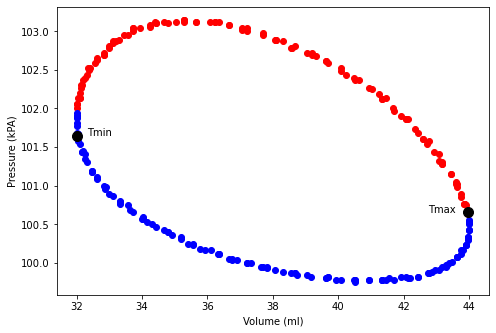

In [278]:
# plotting the upper and lower part with different colors

df2_up = df2_temp.loc[df2_temp['Pressure (physical)'] >= (slope1 * df2_temp['Volume (physical)'] + intercept1)].sort_values(by=['Volume (physical)']).reset_index()
df2_down = df2_temp.loc[df2_temp['Pressure (physical)'] < (slope1 * df2_temp['Volume (physical)'] + intercept1)].sort_values(by=['Volume (physical)']).reset_index()

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df2_up['Volume (physical)'], df2_up['Pressure (physical)'], color='r')
ax.scatter(df2_down['Volume (physical)'], df2_down['Pressure (physical)'], color='b')
ax.set_xlabel('Volume (ml)')
ax.set_ylabel('Pressure (kPA)')
plt.scatter([v1, v2], [p1, p2], color='black', s=100, marker='o')
plt.annotate('Tmin', (v1+0.3, p1))
plt.annotate('Tmax', (v2-1.2, p2))
plt.show()

In [279]:
# Calculate experimental work done (actual data points of volume as x)

y1 = df2_up['Pressure (physical)']  
x1 = df2_up['Volume (physical)']

y2 = df2_down['Pressure (physical)']  
x2 = df2_down['Volume (physical)']

# using Trapezoidal rule:

area_up = np.trapz(y1,x=x1)
print('upper area: ', area_up)

area_down = np.trapz(y2,x=x2)
print('lower area: ', area_down)

Wexp = area_up - area_down
print('area enclosed: ', Wexp)

upper area:  1223.011502865761
lower area:  1201.8516754522323
area enclosed:  21.159827413528774


In [280]:
# Calculate theoretical work done with Vmax and Vmin of the Tmax and Tmin points respectively

W_compression = T_min * np.log(v1/v2)
print('Work done during compression', W_compression)
W_expansion = T_max * np.log(v2/v1)
print('Work done during expansion: ', W_expansion)
W_total = W_expansion + W_compression
print('Total work done (theoretical): ', W_total)

percentage_error = np.abs(Wexp-W_total)/W_total
print("Percentage error: ", percentage_error)

Work done during compression -1030.5086032188838
Work done during expansion:  1400.550608948899
Total work done (theoretical):  370.04200573001526
Percentage error:  0.942817769102227


In [281]:
# Calculate theoretical work done if Vmax and Vmin is exactly 44 and 32 respectively

W_compression = T_min * np.log(32/44)
print('Work done during compression', W_compression)
W_expansion = T_max * np.log(44/32)
print('Work done during expansion: ', W_expansion)
W_total = W_expansion + W_compression
print('Total work done (theoretical): ', W_total)

percentage_error = np.abs(Wexp-W_total)/W_total
print("Percentage error: ", percentage_error)

Work done during compression -1036.5994438791615
Work done during expansion:  1408.8285899081236
Total work done (theoretical):  372.2291460289621
Percentage error:  0.9431537598834822


## Plotting the Stirling cycle the other readings

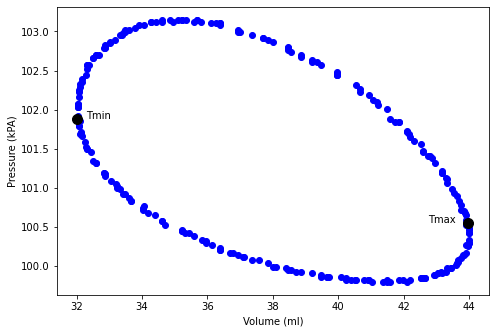

In [288]:
read_df2 = pd.read_csv("Data2/stirling1.csv")
df2 = (pd.DataFrame(read_df2['Analog in 1\tAnalog in 1\tAnalog in 2'].str.split('\t').tolist()[1:], columns=['Volume', 'Volume', 'Pressure'])).iloc[:,1:]

# converting the data type from string to numeric (float)
df2['Volume'] = pd.to_numeric(df2["Volume"])
df2['Pressure'] = pd.to_numeric(df2["Pressure"])

# Apply the equation from the syringe experiment
df2['Pressure (physical)'] = slope0 * df2['Pressure'] + intercept0

# Scale volume to actual value using scaler (same as before)

scaler = MinMaxScaler(feature_range=(32,44))
vol = -1*(df2['Volume']).values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df2['Volume (physical)'] = vol2

# Scale volume to actual value using scaler (same as before)

scaler = MinMaxScaler(feature_range=(32,44))
vol = -1*(df2['Volume']).values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df2['Volume (physical)'] = vol2

# calculating nRT from PV = nRT
df2['nRT'] = df2['Pressure (physical)'] * df2['Volume (physical)']

# sort the table by nRT (temperature)
df2_temp = df2.sort_values(by=['nRT'])

# finding data points that have maximum and minimum temperature

T_max = df2_temp['nRT'].max()
T_min = df2_temp['nRT'].min()

# finding the pressure and volume of the maximum (p1, v1) and minimum (p2, v2) temperature

p1, v1 = np.array(df2_temp.loc[df2_temp['nRT']==T_min][['Pressure (physical)', 'Volume (physical)']])[0]
p2, v2 = np.array(df2_temp.loc[df2_temp['nRT']==T_max][['Pressure (physical)', 'Volume (physical)']])[0]

# plot PV diagram using scatter plot

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df2_temp['Volume (physical)'], df2_temp['Pressure (physical)'], color='b')
ax.set_xlabel('Volume (ml)')
ax.set_ylabel('Pressure (kPA)')
plt.scatter([v1, v2], [p1, p2], color='black', s=100, marker='o')
plt.annotate('Tmin', (v1+0.3, p1))
plt.annotate('Tmax', (v2-1.2, p2))
plt.show()

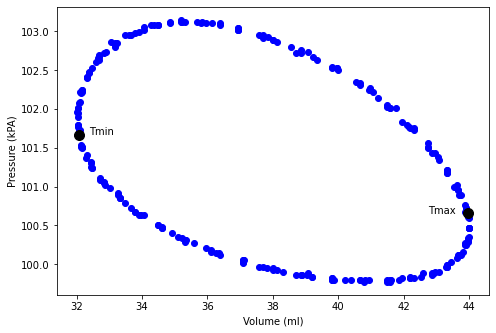

In [289]:
read_df2 = pd.read_csv("Data2/stirling3.csv")
df2 = (pd.DataFrame(read_df2['Analog in 1\tAnalog in 1\tAnalog in 2'].str.split('\t').tolist()[1:], columns=['Volume', 'Volume', 'Pressure'])).iloc[:,1:]

# converting the data type from string to numeric (float)
df2['Volume'] = pd.to_numeric(df2["Volume"])
df2['Pressure'] = pd.to_numeric(df2["Pressure"])

# Apply the equation from the syringe experiment
df2['Pressure (physical)'] = slope0 * df2['Pressure'] + intercept0

# Scale volume to actual value using scaler (same as before)

scaler = MinMaxScaler(feature_range=(32,44))
vol = -1*(df2['Volume']).values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df2['Volume (physical)'] = vol2

# Scale volume to actual value using scaler (same as before)

scaler = MinMaxScaler(feature_range=(32,44))
vol = -1*(df2['Volume']).values.reshape(-1, 1)
scaler.fit(vol)
vol2 = scaler.transform(vol)
df2['Volume (physical)'] = vol2

# calculating nRT from PV = nRT
df2['nRT'] = df2['Pressure (physical)'] * df2['Volume (physical)']

# sort the table by nRT (temperature)
df2_temp = df2.sort_values(by=['nRT'])

# finding data points that have maximum and minimum temperature

T_max = df2_temp['nRT'].max()
T_min = df2_temp['nRT'].min()

# finding the pressure and volume of the maximum (p1, v1) and minimum (p2, v2) temperature

p1, v1 = np.array(df2_temp.loc[df2_temp['nRT']==T_min][['Pressure (physical)', 'Volume (physical)']])[0]
p2, v2 = np.array(df2_temp.loc[df2_temp['nRT']==T_max][['Pressure (physical)', 'Volume (physical)']])[0]

# plot PV diagram using scatter plot

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df2_temp['Volume (physical)'], df2_temp['Pressure (physical)'], color='b')
ax.set_xlabel('Volume (ml)')
ax.set_ylabel('Pressure (kPA)')
plt.scatter([v1, v2], [p1, p2], color='black', s=100, marker='o')
plt.annotate('Tmin', (v1+0.3, p1))
plt.annotate('Tmax', (v2-1.2, p2))
plt.show()